In [1]:
import newdetrender as ndt
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os   

In [2]:
star = [176872276]

In [3]:
lctest, statstest = ndt.detrend_data(star)

starting dl for target: 176872276
found 12 files
working on: LightCurves/tess2019112060037-s0011-0000000176872276-0143-s_lc.fits
working on: LightCurves/tess2018349182459-s0006-0000000176872276-0126-s_lc.fits
working on: LightCurves/tess2018263035959-s0003-0000000176872276-0123-s_lc.fits
working on: LightCurves/tess2019169103026-s0013-0000000176872276-0146-s_lc.fits
working on: LightCurves/tess2019085135100-s0010-0000000176872276-0140-s_lc.fits
working on: LightCurves/tess2019140104343-s0012-0000000176872276-0144-s_lc.fits
working on: LightCurves/tess2018234235059-s0002-0000000176872276-0121-s_lc.fits
working on: LightCurves/tess2018206045859-s0001-0000000176872276-0120-s_lc.fits
working on: LightCurves/tess2019032160000-s0008-0000000176872276-0136-s_lc.fits
working on: LightCurves/tess2019058134432-s0009-0000000176872276-0139-s_lc.fits
working on: LightCurves/tess2018292075959-s0004-0000000176872276-0124-s_lc.fits
working on: LightCurves/tess2019006130736-s0007-0000000176872276-0131-s

In [4]:
lc_idxtest = np.arange(0, len(lctest), 1)    #min, max, interval
mytabletest = Table([lc_idxtest, statstest[0], statstest[1]], names = ('lc_idx','star_id','sector'))
mytabletest

lc_idx,star_id,sector
int64,int32,int32
0,176872276,11
1,176872276,6
2,176872276,3
3,176872276,13
4,176872276,10
5,176872276,12
6,176872276,2
7,176872276,1
8,176872276,8


In [12]:
#removing outliers
lctest7 = lctest[7].remove_outliers()
lctest6 = lctest[6].remove_outliers()
lctest2 = lctest[2].remove_outliers()
lctest10 = lctest[10].remove_outliers()

In [14]:
#seperating arrays
#call each data array per sector.. change lcs[index] to access other sectors

#sector 1
fluxtest_1 = lctest7.flux
flux_errtest_1 = lctest7.flux_err
timetest_1 = lctest7.time
#sector 2
fluxtest_2 = lctest6.flux
flux_errtest_2 = lctest6.flux_err
timetest_2 = lctest6.time
#sector 3
fluxtest_3 = lctest2.flux
flux_errtest_3 = lctest2.flux_err
timetest_3 = lctest2.time
#sector 4
fluxtest_4 = lctest10.flux
flux_errtest_4 = lctest10.flux_err
timetest_4 = lctest10.time

print(len(fluxtest_1), len(flux_errtest_1), len(timetest_1))
print(len(fluxtest_2), len(flux_errtest_2), len(timetest_2))
print(len(fluxtest_3), len(flux_errtest_3), len(timetest_3))
print(len(fluxtest_4), len(flux_errtest_4), len(timetest_4))

18103 18103 18103
18316 18316 18316
13441 13441 13441
15743 15743 15743


In [16]:
#create mask
masktest_1 = (timetest_1 > 1348.7) & (timetest_1 < 1349.3)
masktest_3 = (timetest_3 > 1394.8) & (timetest_3 < 1395.5) 
masktest_4 = (timetest_4 > 1422.6) & (timetest_4 < 1423.6) 
#masktest_4b = (timetest_4 > 1436.5) & (timetest_4 < 1437)


In [17]:
#applying mask....saved masked arrays as NEW variables
masked_timetest_1 = timetest_1[~masktest_1]
masked_fluxtest_1 = fluxtest_1[~masktest_1]
masked_flux_errtest_1 = flux_errtest_1[~masktest_1]

masked_timetest_3 = timetest_3[~masktest_3]
masked_fluxtest_3 = fluxtest_3[~masktest_3]
masked_flux_errtest_3 = flux_errtest_3[~masktest_3]

masked_timetest_4 = timetest_4[~masktest_4]
masked_fluxtest_4 = fluxtest_4[~masktest_4]
masked_flux_errtest_4 = flux_errtest_4[~masktest_4]


In [19]:
#normalizing
cleaned_fluxtest_1 = masked_fluxtest_1 / np.mean(masked_fluxtest_1)
cleaned_flux_errtest_1 = masked_flux_errtest_1 / np.mean(masked_flux_errtest_1)
cleaned_timetest_1 = masked_timetest_1

cleaned_fluxtest_2 =  fluxtest_2 / np.mean(fluxtest_2)
cleaned_flux_errtest_2 = flux_errtest_2 / np.mean(flux_errtest_2)
cleaned_timetest_2 = timetest_2

cleaned_fluxtest_3 = masked_fluxtest_3 / np.mean(masked_fluxtest_3)
cleaned_flux_errtest_3 = masked_flux_errtest_3 / np.mean(masked_flux_errtest_3)
cleaned_timetest_3 = masked_timetest_3

cleaned_fluxtest_4 = masked_fluxtest_4 / np.mean(masked_fluxtest_4)
cleaned_flux_errtest_4 = masked_flux_errtest_4 / np.mean(masked_flux_errtest_4)
cleaned_timetest_4 = masked_timetest_4

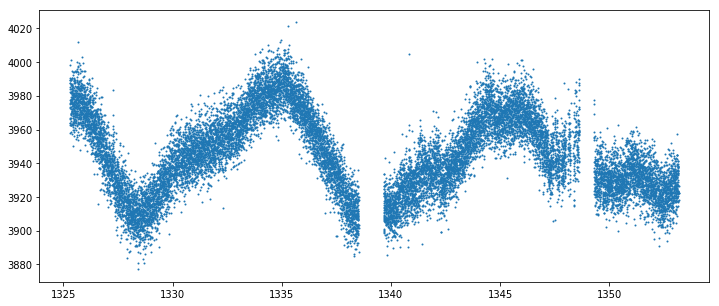

In [20]:
plt.figure(figsize = (12,5))
plt.scatter(masked_timetest_1, masked_fluxtest_1, s=1)

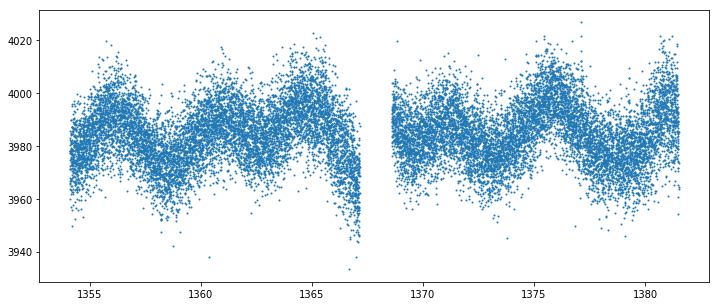

In [24]:
plt.figure(figsize = (12,5))
plt.scatter(timetest_2, fluxtest_2, s=1)

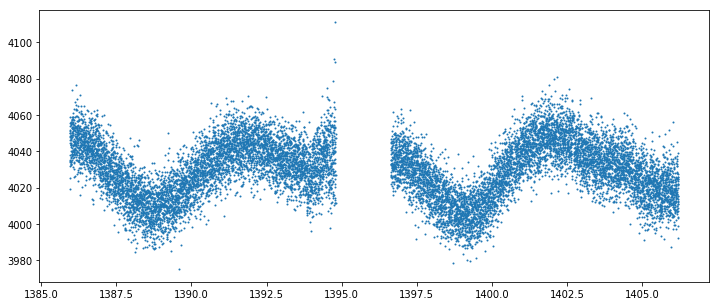

In [21]:
plt.figure(figsize = (12,5))
plt.scatter(masked_timetest_3, masked_fluxtest_3, s=1)

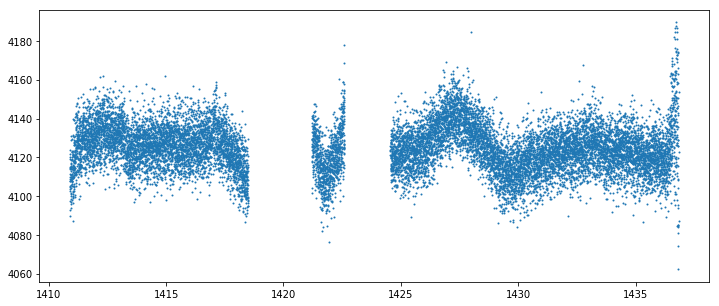

In [23]:
plt.figure(figsize = (12,5))
plt.scatter(masked_timetest_4, masked_fluxtest_4, s=1)